# <font color='blue'>SENG 474 - Assignment  (Experiments and Analysis)</font>


Student Name:  Mek Obchey \
Student ID:    V00880355 \
Spring 2020


In [195]:
# Preprocessing - binary classification

import numpy as np
import pandas as pd
# from tensorflow.keras.datasets import fashion_mnist

df_train = pd.read_csv('data/fashion-mnist_train.csv')
df_test = pd.read_csv('data/fashion-mnist_test.csv')

# shuffle two lists with same order
# Author: Francesco Montesano 
# source: https://stackoverflow.com/questions/23289547/shuffle-two-list-at-once-with-same-order
def shuffle_in_unison(a, b):
    n_elem = a.shape[0]
    indices = np.random.choice(n_elem, size=n_elem, replace=False)
    return a[indices], b[indices]

X_train = df_train.iloc[:,1:]
y_train = df_train.iloc[:,0]

X_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0]

# (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


# Rescale X_train and X_
X_train = X_train/255
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_train)

        
X_train = np.array(X_train)
y_train = np.array(y_train)

# store a copy of the original dataset to be used in Analysis 3-1 and 3-2
X_train_all = X_train
y_train_all = y_train

X_test = np.array(X_test)
y_test = np.array(y_test)

# Remove all classes that are not 5 and 7 in the training set
s = []
fives = 0
sevens = 0
max_examples = 3000
for i in range(0, len(y_train)):
    if y_train[i] == 5 and fives < max_examples:
        s.append(i)
        fives += 1
    elif y_train[i] == 7 and sevens < max_examples:
        s.append(i)
        sevens += 1
X_train = X_train[s]
y_train = y_train[s]


# Remove all classes that are not 5 and 7 in the test set
s.clear()
for i in range(0, len(y_test)):
    if y_test[i] in {5, 7}:
        s.append(i)  
X_test = X_test[s]
y_test = y_test[s]

# Replace class 5 and 7 for binary classification
y_train[y_train == 5] = 0
y_train[y_train == 7] = 1
y_test[y_test == 5] = 0
y_test[y_test == 7] = 1


# Convert examples from 3D to 2D for Logistic Regression and SVM classifiers
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)


array([0, 1, 1, ..., 0, 0, 0])

In [5]:
# Functions for graphing
from matplotlib import pyplot as plt

# Calculate train vs test error of a classifier.
def calculate_errors(classifier, parameter, param_range, X_train, y_train, X_test, y_test):
    train_errors = list()
    test_errors = list()
    for i in param_range:
        eval('classifier.set_params(' + parameter + '=i)')
        classifier.fit(X_train, y_train)
        train_errors.append(classifier.score(X_train, y_train))
        test_errors.append(classifier.score(X_test, y_test))
    return (train_errors, test_errors)

def graph_train_test_errors(train_errors, test_errors, param, param_range, title):
    ############## Optimal Parameter ############
    i_param_optim = np.argmax(test_errors)
    param_optim = param_range[i_param_optim]
    print("Optimal parameter : %s" % param_optim)
    #############################################
    lw = 2
    plt.plot(param_range, train_errors, label="Train",color="darkorange", lw=lw)
    plt.plot(param_range, test_errors, label="Test",  color="navy", lw=lw)
    plt.vlines(param_optim, plt.ylim()[0], np.max(test_errors), color='k',
               linewidth=lw, label='Optimum on test')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(title)
    plt.xlabel('Number of ' + param.upper())
    plt.ylabel('Accuracy')
    plt.autoscale()
    plt.show()

## <font color='black'> Analysis 1 : Logistic Regression</font>

Plot training vs test error using various regularization parameter C

In [206]:
from sklearn.linear_model import LogisticRegression
# Please note: I tried to suppress the ConvergenceWarning with setting higher max_iter
# but it takes a long time to run 

# Parameter to test
param = 'C'
param_range = np.logspace(-3, 2, 20, base = 3)
# param_range = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]
classifier = LogisticRegression(penalty = 'l2', random_state = 0, max_iter = 100, class_weight = 'balanced')

train_errors, test_errors = calculate_errors(classifier, param, param_range, X_train, y_train, X_test, y_test)


/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

Optimal parameter : 6.740378497983349


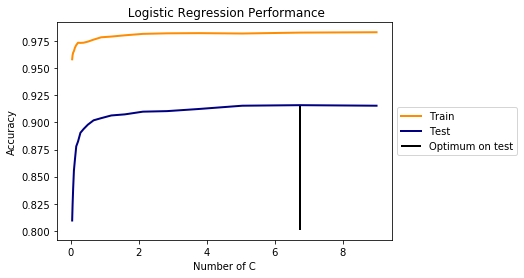

In [207]:
param_range
graph_train_test_errors(train_errors, test_errors, param, param_range, title=' Logistic Regression Performance')


In [175]:
np.logspace(-3,3,7)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

## <font color='black'> Analysis 2 : Support Vector Machine</font>

In [221]:
from sklearn.svm import SVC

param = 'C'
param_range = np.logspace(-2, 3, 15, base = 3)

# penalty = 'l2' by default
classifier = SVC(kernel = 'linear', random_state = 0, max_iter = 4000)

train_errors, test_errors = calculate_errors(classifier, param, param_range, X_train, y_train, X_test, y_test)


/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/matt/a

Optimal parameter : 3.7963087295449616


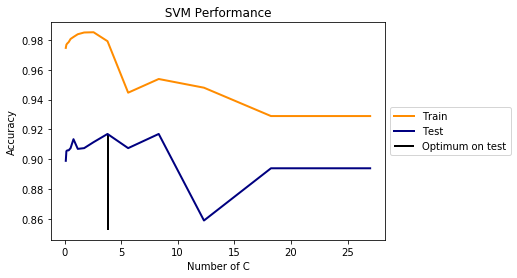

In [222]:
graph_train_test_errors(train_errors, test_errors, param, param_range, title=' SVM Performance ')


## <font color='black'> Analysis 3-1 Cross Validation for Logistic Regression</font>

To find the optimal regularization parameter for a logistic regression classifier

In [274]:
# Cross Validation Implementation


# X_train, y_train = shuffle_in_unison(X_train, y_train)

# K-Fold CV, where 5 <= k <= 10   
k = 10

# Split dataset set into k folds
X_cv = np.array(np.split(X_train, k))
y_cv = np.array(np.split(y_train, k))

# Tuning parameter
param = 'C'
param_range = np.logspace(-500, -1, 40, base = 3)
# param_range = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]


# takes about a minute to run
logreg = LogisticRegression(penalty = 'l2', random_state = 0, max_iter = 100, multi_class = 'ovr')



train_test_logreg = []

for i in range(0, k):
    excludes = [i != m for m in range(0, k)]
    X_train_cv = X_cv[excludes]
    y_train_cv = y_cv[excludes]

    X_train_cv = np.concatenate(X_train_cv) 
    y_train_cv = np.concatenate(y_train_cv)

    X_test_cv = X_cv[i]
    y_test_cv = y_cv[i]
    
    train_error_logreg, test_error_logreg = calculate_errors(logreg, param, param_range, 
                                             X_train_cv, y_train_cv, X_test_cv, y_test_cv)
    train_test_logreg.append((train_error_logreg, test_error_logreg))




/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#

In [277]:
for i in range(0, len(train_test_logreg)):
    graph_train_test_errors(train_test_logreg[i][0], train_test_logreg[i][1],
                            param, param_range, title=' SVM Performance on C.V. Test #' + str(i))



IndexError: index 39 is out of bounds for axis 0 with size 15

## <font color='black'> Analysis 3-2 Cross Validation for SVM </font>

To find the optimal regularization parameter for a SVM classifier

In [290]:
# Cross Validation Implementation


# X_train, y_train = shuffle_in_unison(X_train, y_train)

# K-Fold CV, where 5 <= k <= 10   
k = 10

# Split dataset set into k folds
X_cv = np.array(np.split(X_train, k))
y_cv = np.array(np.split(y_train, k))

# Tuning parameter
param = 'C'
param_range = np.logspace(-300, 0, 20, base = 3)
# takes about 2 minutes to run
svm = SVC(kernel = 'linear', random_state = 0, max_iter = 100)

train_test_svm = []

for i in range(0, k):
    excludes = [i != m for m in range(0, k)]
    X_train_cv = X_cv[excludes]
    y_train_cv = y_cv[excludes]

    X_train_cv = np.concatenate(X_train_cv) 
    y_train_cv = np.concatenate(y_train_cv)

    X_test_cv = X_cv[i]
    y_test_cv = y_cv[i]
    
    train_error_svm, test_error_svm = calculate_errors(svm, param, param_range, 
                                             X_train_cv, y_train_cv, X_test_cv, y_test_cv)
    train_test_svm.append((train_error_svm, test_error_svm))




/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/matt/anaco

/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/matt/anaco

/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/matt/anaco

/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/matt/anaco

/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/matt/anaco

/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/matt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/matt/anaco

Optimal parameter : 2.7808496406186805e-13


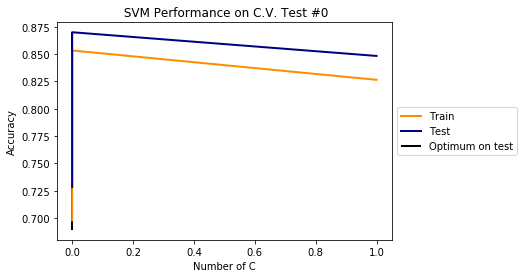

Optimal parameter : 2.7808496406186805e-13


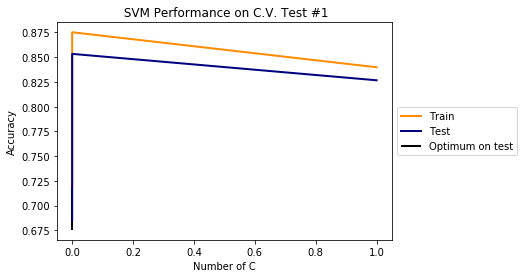

Optimal parameter : 1.0


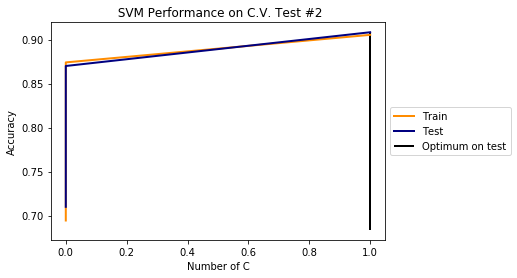

Optimal parameter : 2.7808496406186805e-13


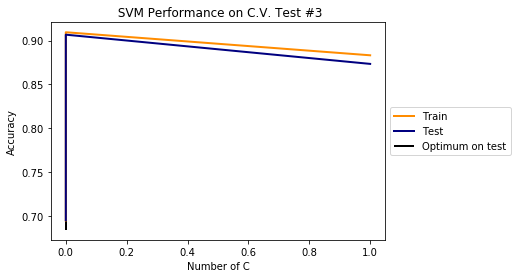

Optimal parameter : 1.0


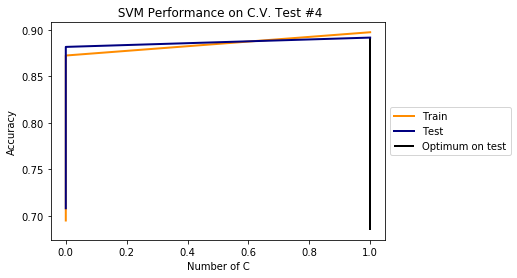

Optimal parameter : 2.7808496406186805e-13


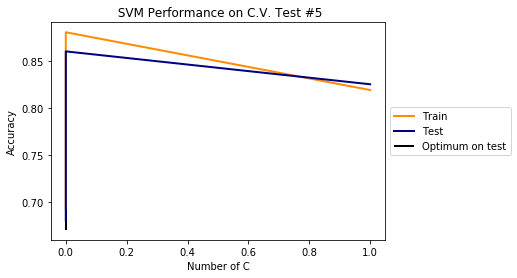

Optimal parameter : 1.0


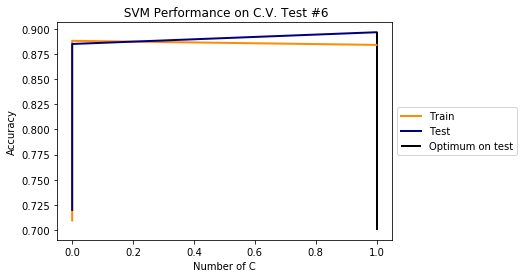

Optimal parameter : 2.7808496406186805e-13


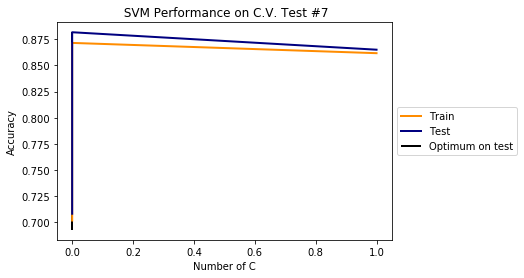

Optimal parameter : 1.0


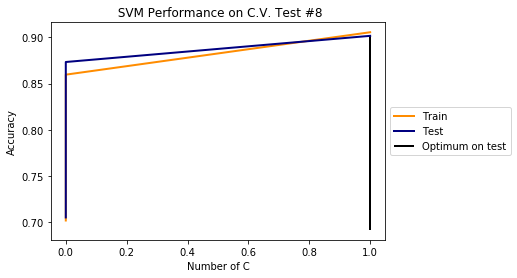

Optimal parameter : 2.7808496406186805e-13


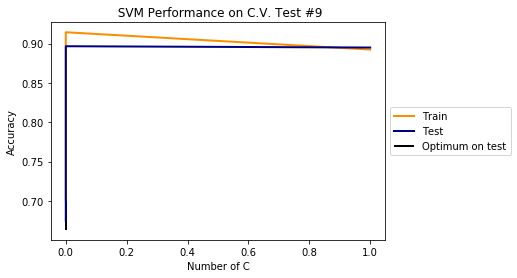

In [289]:
for i in range(0, len(train_test_svm)):
    graph_train_test_errors(train_test_svm[i][0], train_test_svm[i][1],
                            param, param_range, title=' SVM Performance on C.V. Test #' + str(i))
    


## <font color='black'> Part 4 : Kernelized SVMs with Gaussian Kernel</font>

In [ ]:
# # Cross Validation Implementation


# Fourth. The final part of the assignment is to go beyond linear classifiers. For this, you’ll use
# kernelized SVMs with the Gaussian kernel. This kernel has a scale parameter (sometimes called
# a “bandwidth” parameter). For each value γ in a good range of values of the scale parameter
# (I suggest using a logarithmic spacing as you did with the regularization parameter), use k-fold
# cross-validation on the training set to select the optimal regularization parameter C γ . Now, for
# each (γ, C γ ) pair, you have a tuned SVM that can be trained. For each tuned SVM, train on the
# full training set and compute both the training error and the test error. Finally, plot the results.
# The x-axis will be γ, and the y-axis will be the training error (or test error) based on an SVM with
# parameters tuned to (γ, C γ ).
# How do these test errors compare to the test error of linear SVM (with regularization parameter
# tuned via cross-validation on the training set, which you already did)


# # X_train, y_train = shuffle_in_unison(X_train, y_train)

# # K-Fold CV, where 5 <= k <= 10   
# k = 10

# # Split dataset set into k folds
# X_cv = np.array(np.split(X_train, k))
# y_cv = np.array(np.split(y_train, k))

# Tuning parameter (scale)
param = 'C'
param_range = np.logspace(-500, 0, 20, base = 3)
# takes about 2 minutes to run
svm = SVC(kernel = 'rbf', random_state = 0, max_iter = 100)

# train_test_svm = []

# for i in range(0, k):
#     excludes = [i != m for m in range(0, k)]
#     X_train_cv = X_cv[excludes]
#     y_train_cv = y_cv[excludes]

#     X_train_cv = np.concatenate(X_train_cv) 
#     y_train_cv = np.concatenate(y_train_cv)

#     X_test_cv = X_cv[i]
#     y_test_cv = y_cv[i]
    
#     train_error_svm, test_error_svm = calculate_errors(svm, param, param_range, 
#                                              X_train_cv, y_train_cv, X_test_cv, y_test_cv)
#     train_test_svm.append((train_error_svm, test_error_svm))


